#Tugas Individu Modul 2

## Rafi Fadhlillah
## 121450143

## a) Lakukan Integrasi data pada kedua dataset yaitu dataset diabetes_RS1 dan diabetes_RS2 dengan memperhatikan kolom Age ! (Nb. Penulisan nama kolom harus sama persis, maka ubah salah satu nama kolom terlebih dahulu menjadi Age atau AGE)

In [1]:
# Mengimpor library pandas dengan alias pd
import pandas as pd

# Membaca file CSV RS1 dan menyimpannya dalam DataFrame RS1
RS1 = pd.read_csv("/content/drive/MyDrive/PrakDamin/diabetes_RS1.csv")

# Membaca file CSV RS2 dan menyimpannya dalam DataFrame RS2
RS2 = pd.read_csv("/content/drive/MyDrive/PrakDamin/diabetes_RS2.csv")


In [2]:
RS1.head() # menampilkan 5 baris teratas dataset RS1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
RS2.head() #menampilkan 5 baris teratas dataset RS2

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
RS2.rename(columns={'AGE': 'Age'}, inplace=True) #mengganti nama atribut AGE menjadi Age untuk menyamakan dengan dataset RS1
RS2.head() #cek apakah AGE sudah berhasil dirubah menjadi Age dengan menampilkan kembali 5 baris pertama dataset RS2

,ID,No_Pation,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
diabetes = pd.merge(RS1, RS2, on='Age') #integrasi dataset RS1 dan RS2 berdasarkan kolom Age
diabetes.head() # cek apakah sudah ter integrasi dengan menampilkan 5 baris teratas dataset diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,ID,...,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI_y,CLASS
0,6,148,72,35,0,33.6,0.627,50,1,502,...,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,6,148,72,35,0,33.6,0.627,50,1,420,...,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,6,148,72,35,0,33.6,0.627,50,1,680,...,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,6,148,72,35,0,33.6,0.627,50,1,721,...,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
4,6,148,72,35,0,33.6,0.627,50,1,402,...,3.5,39.0,4.0,4.0,1.5,1.2,2.2,0.7,24.0,N


In [6]:
diabetes.to_csv("integrasi_RS1danRS2.csv")

## b) Buatlah tabel berisi hasil output dari proses reduksi dimensi yang ada pada code DimensionalityReduction_Praktikum2.ipynb kemudian lakukan perbandingan dan analisis hasil dari metode PCA, SVD, dan TSNE masing-masing 2D dan 3D!

In [7]:
# Impor library pandas dengan alias pd
import pandas as pd
# Impor library numpy dengan alias np
import numpy as np
# Impor modul PCA dan TruncatedSVD dari scikit-learn
from sklearn.decomposition import PCA, TruncatedSVD
# Impor modul TSNE dari scikit-learn
from sklearn.manifold import TSNE
# Impor modul matplotlib.pyplot dengan alias plt
import matplotlib.pyplot as plt
# Impor modul Axes3D dari mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

# Memuat dataset digit yang disediakan oleh scikit-learn
from sklearn.datasets import load_digits
digits = load_digits()

# Melakukan PCA dengan 2 komponen
pca2 = PCA(n_components=2)
digits_pca2 = pca2.fit_transform(digits.data)
df_pca2 = pd.DataFrame(data=digits_pca2, columns=['PCA1', 'PCA2'])
df_pca2['Label'] = digits.target

# Melakukan PCA dengan 3 komponen
pca3 = PCA(n_components=3)
digits_pca3 = pca3.fit_transform(digits.data)
df_pca3 = pd.DataFrame(data=digits_pca3, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca3['Label'] = digits.target

# Melakukan SVD dengan 2 komponen
svd2 = TruncatedSVD(n_components=2)
digits_svd2 = svd2.fit_transform(digits.data)
df_svd2 = pd.DataFrame(data=digits_svd2, columns=['SVD1', 'SVD2'])
df_svd2['Label'] = digits.target

# Melakukan SVD dengan 3 komponen
svd3 = TruncatedSVD(n_components=3)
digits_svd3 = svd3.fit_transform(digits.data)
df_svd3 = pd.DataFrame(data=digits_svd3, columns=['SVD1', 'SVD2', 'SVD3'])
df_svd3['Label'] = digits.target

# Melakukan t-SNE dengan 2 komponen
tsne2 = TSNE(n_components=2)
digits_tsne2 = tsne2.fit_transform(digits.data)
df_tsne2 = pd.DataFrame(data=digits_tsne2, columns=['t-SNE1', 't-SNE2'])
df_tsne2['Label'] = digits.target

# Melakukan t-SNE dengan 3 komponen
tsne3 = TSNE(n_components=3)
digits_tsne3 = tsne3.fit_transform(digits.data)
df_tsne3 = pd.DataFrame(data=digits_tsne3, columns=['t-SNE1', 't-SNE2', 't-SNE3'])
df_tsne3['Label'] = digits.target

# Menggabungkan semua hasil ke dalam satu DataFrame
result_df = pd.concat([df_pca2, df_pca3, df_svd2, df_svd3, df_tsne2, df_tsne3], axis=1)

# Menambahkan label target
result_df['Label'] = digits.target

# Mencetak beberapa baris pertama dari DataFrame
print(result_df.head())

        PCA1       PCA2  Label       PCA1       PCA2      PCA3  Label  \
0  -1.259469  21.274882      0  -1.259467  21.274884 -9.463058      0   
1   7.957609 -20.768701      1   7.957610 -20.768696  4.439496      1   
2   6.991926  -9.955984      2   6.991924  -9.955988  2.958568      2   
3 -15.906108   3.332463      3 -15.906106   3.332465  9.824366      3   
4  23.306869   4.269061      4  23.306867   4.269060 -5.675120      4   

        SVD1       SVD2  Label  ...       SVD2       SVD3  Label     t-SNE1  \
0  45.861277  -1.192146      0  ...  -1.192110  21.100071      0  -2.297925   
1  55.529679   7.861879      1  ...   7.861691 -20.487247      1  10.711530   
2  55.827884   6.914530      2  ...   6.914605  -9.662453      2 -13.709768   
3  45.135745 -15.889118      3  ... -15.889117   3.338118      3 -36.214569   
4  40.742256  23.367820      4  ...  23.367870   3.926229      4  42.744411   

      t-SNE2  Label     t-SNE1     t-SNE2    t-SNE3  Label  
0  57.210117      0   0.5

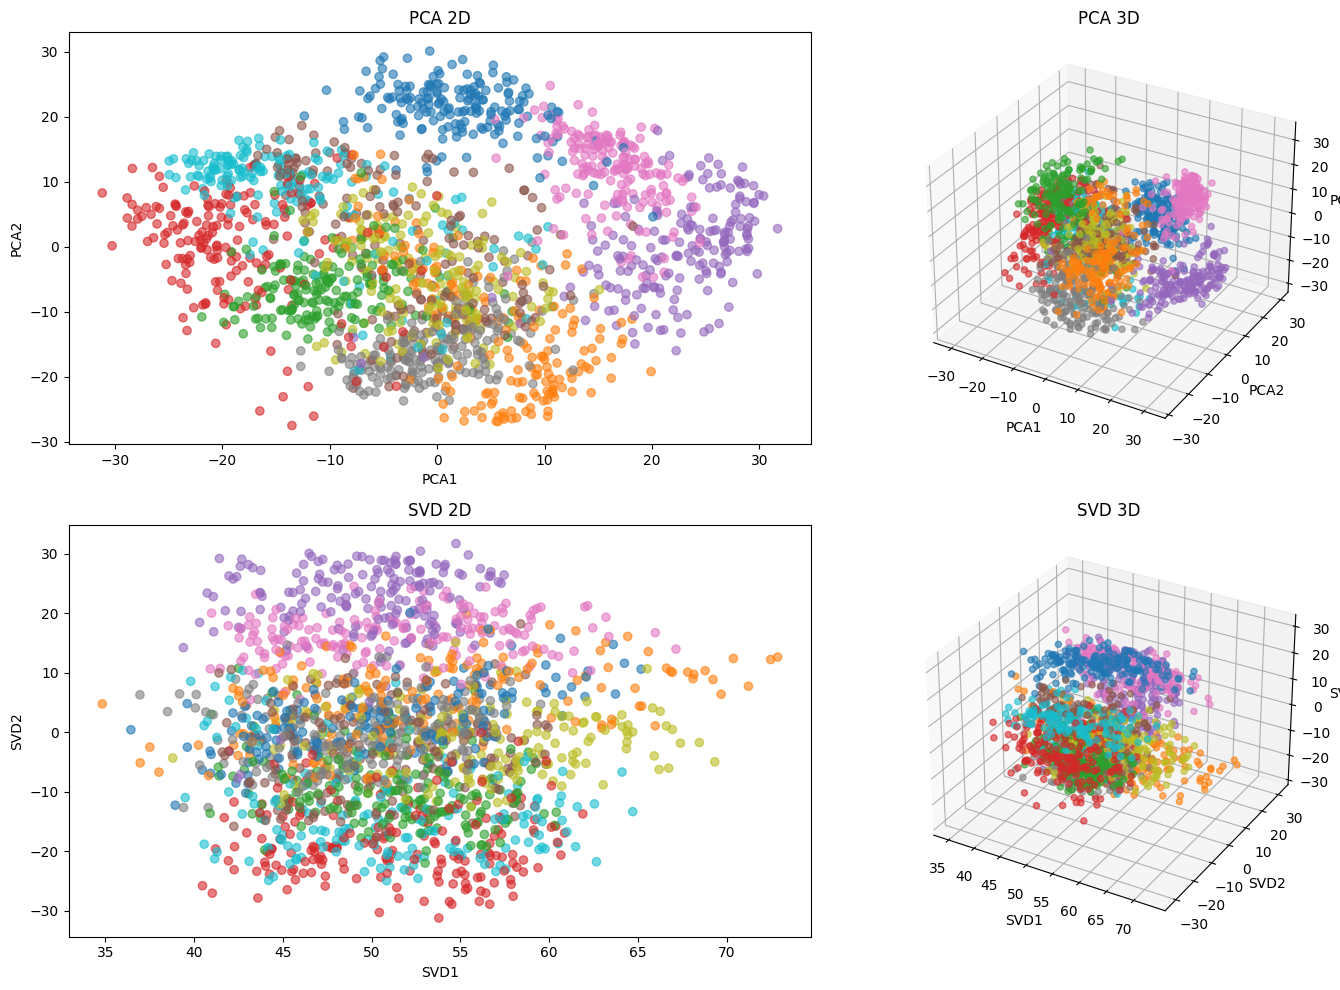

In [8]:
# Import modul matplotlib.pyplot dengan alias plt
import matplotlib.pyplot as plt
# Import modul Axes3D dari mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

# Membuat figure dengan ukuran 15x10
plt.figure(figsize=(15, 10))

# Plot PCA 2D
plt.subplot(2, 2, 1)
plt.scatter(df_pca2['PCA1'], df_pca2['PCA2'], c=df_pca2['Label'], cmap='tab10', alpha=0.6)
plt.title('PCA 2D')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Plot PCA 3D
ax = plt.subplot(2, 2, 2, projection='3d')
ax.scatter(df_pca3['PCA1'], df_pca3['PCA2'], df_pca3['PCA3'], c=df_pca3['Label'], cmap='tab10', alpha=0.6)
ax.set_title('PCA 3D')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Plot SVD 2D
plt.subplot(2, 2, 3)
plt.scatter(df_svd2['SVD1'], df_svd2['SVD2'], c=df_svd2['Label'], cmap='tab10', alpha=0.6)
plt.title('SVD 2D')
plt.xlabel('SVD1')
plt.ylabel('SVD2')

# Plot SVD 3D
ax = plt.subplot(2, 2, 4, projection='3d')
ax.scatter(df_svd3['SVD1'], df_svd3['SVD2'], df_svd3['SVD3'], c=df_svd3['Label'], cmap='tab10', alpha=0.6)
ax.set_title('SVD 3D')
ax.set_xlabel('SVD1')
ax.set_ylabel('SVD2')
ax.set_zlabel('SVD3')

# Mengatur tata letak subplot yang rapi
plt.tight_layout()
# Menampilkan plot
plt.show()

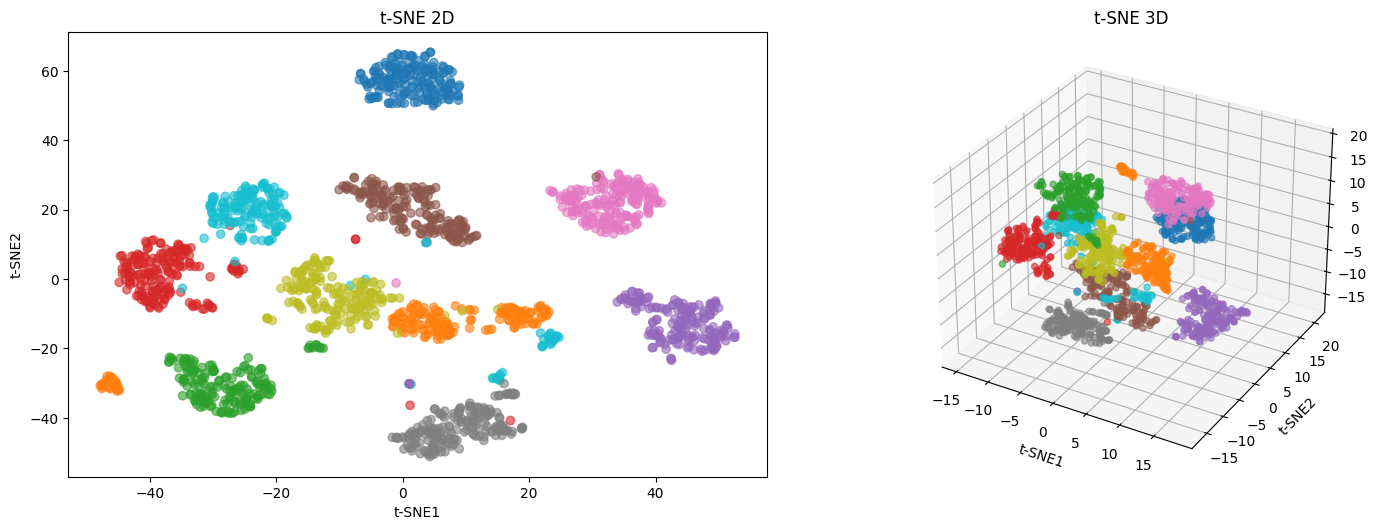

In [9]:
# Membuat figure dengan ukuran 15x10
plt.figure(figsize=(15, 10))

# Plot t-SNE 2D
plt.subplot(2, 2, 1)
plt.scatter(df_tsne2['t-SNE1'], df_tsne2['t-SNE2'], c=df_tsne2['Label'], cmap='tab10', alpha=0.6)
plt.title('t-SNE 2D')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

# Plot t-SNE 3D
ax = plt.subplot(2, 2, 2, projection='3d')
ax.scatter(df_tsne3['t-SNE1'], df_tsne3['t-SNE2'], df_tsne3['t-SNE3'], c=df_tsne3['Label'], cmap='tab10', alpha=0.6)
ax.set_title('t-SNE 3D')
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')

# Mengatur tata letak subplot yang rapi
plt.tight_layout()
# Menampilkan plot
plt.show()

| Metode   | Dimensi | Perbandingan |
|----------|---------|--------------------------|
| PCA      | 2D      | Dilihat dari hasil plotnya, masih sulit untuk melihat perbedaan antar kategorinya karena warnanya cenderung campur namun ada sedikit jarak                                                   |
|          | 3D      | masih cukup sulit juga namun karena 3D kita dapat melihat dari sisi lain sehingga sedikit tergambarkan kategorinya                                                  |
| SVD      | 2D      | Menurut saya ini lebih buruk dibanding PCA 2D karena warnanya benar benar tercampur dan saling menumpuk(tidak ada jarak)                                                 |
|          | 3D      |  Untuk yang 3D juga tidak bisa melihat perbedaan kategoriknya walaupun mendapatkan pandangan dari sisi lain namun ini sangat menumpuk jaraknya sangat rapat                                                  |
| t-SNE    | 2D      | Untuk t-SNE 2D ini sudah sangat baik kita dapat melihat kategorinya karena plot warnanya tidak bercampur seperti sebelumnya tetapi sudah terklasifikasi berdasarkan warna warnanya meskipun masih terdapat sedikit error pada titik warnanya namun tidak signifikan                                                     |
|          | 3D      | Untuk 3D kita bisa melihat dari sudut pandang lain namun masih terlihat adanya penumpukan yang menyulitkan untuk melihat klasifikasi warna titiknya namun ini lebih baik dibandingkan 3D pada metode sebelumnya yakni PCA dan SVD                                                     |


Kesimpulan :
- PCA dan SVD cenderung lebih baik dalam menjaga pola linier, sedangkan t-SNE lebih baik dalam mengungkapkan pola non-linier dan cluster dalam data. Karena data diatas non linear maka lebih baik menggunakan t-SNE.

- SVD menunjukkan hasil yang serupa dengan PCA. Namun, interpretasi hasilnya mungkin lebih sulit daripada PCA

- t-SNE 3D interpretasinya mungkin lebih rumit dibandingkan dengan 2D. Meskipun demikian, t-SNE masih dapat membantu mengidentifikasi cluster atau kelompok dalam data 3D dengan lebih baik daripada metode lain dalam beberapa kasus

## c) Dari semua dataset yang ada di praktikum kali ini pililhlah minimal satu dataset kemudian lakukan transformasi data encoding dan label encoding!

Data Transformation (Encoding) Menggunakan dataset Student_bucketing.csv

In [10]:
# Mengimpor library numpy dengan alias np
import numpy as np

# Membaca data dari file CSV yang terletak di "/content/drive/MyDrive/PrakDamin/Student_bucketing.csv"
# dan menyimpannya dalam sebuah DataFrame yang dinamai "st_bucket"
st_bucket = pd.read_csv("/content/drive/MyDrive/PrakDamin/Student_bucketing.csv")

# Menampilkan lima baris pertama dari DataFrame "st_bucket" dengan menggunakan metode "head()"
st_bucket.head()


,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [11]:
# Membuat DataFrame baru bernama "st_bucket_categorical" yang hanya berisi kolom dengan tipe data non-numerik (categorical)
# Dalam hal ini, menggunakan metode "select_dtypes" dengan parameter "exclude=[np.number]" untuk memilih kolom dengan tipe data yang bukan numerik
st_bucket_categorical = st_bucket.select_dtypes(exclude=[np.number])

# Menampilkan DataFrame "st_bucket_categorical" yang hanya berisi kolom-kolom dengan tipe data non-numerik
st_bucket_categorical


,Grade,Employed
0,1st Class,yes
1,2nd Class,no
2,1st Class,no
3,2nd Class,no
4,1st Class,no
...,...,...
227,1st Class,no
228,2nd Class,no
229,3rd Class,yes
230,1st Class,yes


In [12]:
# Memanggil metode "unique()" pada kolom 'Grade' dari DataFrame "st_bucket_categorical"
# Ini digunakan untuk mendapatkan nilai-nilai unik yang terdapat dalam kolom 'Grade'
st_bucket_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [13]:
# Memanggil metode "value_counts()" pada kolom 'Grade' dari DataFrame "st_bucket_categorical"
# Ini digunakan untuk menghitung frekuensi setiap nilai yang ada dalam kolom 'Grade'
st_bucket_categorical.Grade.value_counts()


2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

In [14]:
# Memanggil metode "unique()" pada kolom 'Employed' dari DataFrame "st_bucket_categorical"
# Ini digunakan untuk mendapatkan nilai-nilai unik yang terdapat dalam kolom 'Employed'
st_bucket_categorical['Employed'].unique()


array(['yes', 'no'], dtype=object)

In [15]:
# Memanggil metode "value_counts()" pada kolom 'Employed' dari DataFrame "st_bucket_categorical"
# Ini digunakan untuk menghitung frekuensi setiap nilai yang ada dalam kolom 'Employed'
st_bucket_categorical.Employed.value_counts()


no     133
yes     99
Name: Employed, dtype: int64

In [16]:
# Menggunakan metode "replace()" pada kolom 'Grade' dari DataFrame "st_bucket_categorical"
# Ini digunakan untuk menggantikan nilai-nilai tertentu dalam kolom 'Grade' dengan nilai yang baru
# Dalam kasus ini, menggantikan "1st Class" dengan 1, "2nd Class" dengan 2, dan "3rd Class" dengan 3
# Parameter "inplace=True" digunakan untuk mengganti nilai langsung dalam DataFrame yang ada
st_bucket_categorical.Grade.replace({"1st Class": 1, "2nd Class": 2, "3rd Class": 3}, inplace=True)


In [17]:
# Menggunakan metode "replace()" pada kolom 'Employed' dari DataFrame "st_bucket_categorical"
# Ini digunakan untuk menggantikan nilai-nilai tertentu dalam kolom 'Employed' dengan nilai yang baru
# Dalam kasus ini, menggantikan "yes" dengan 1 (yang mewakili 'employed') dan "no" dengan 0 (yang mewakili 'unemployed')
# Parameter "inplace=True" digunakan untuk mengganti nilai langsung dalam DataFrame yang ada
st_bucket_categorical.Employed.replace({"yes": 1, "no": 0}, inplace=True)


In [18]:
st_bucket_categorical.head() # menampilkan 5 baris teratas st_bucket_categorical

,Grade,Employed
0,1,1
1,2,0
2,1,0
3,2,0
4,1,0


In [19]:
st_bucket_categorical.to_csv("data_encoding_stdbucket.csv")

Data Transformation (Label Encoding) menggunakan dataset Banking_Marketing.csv


In [20]:
# Mengimpor library numpy dengan alias np
import numpy as np

# Membaca data dari file CSV yang terletak di "/content/drive/MyDrive/PrakDamin/Banking_Marketing.csv"
# dan menyimpannya dalam sebuah DataFrame yang dinamai "df_market"
df_market = pd.read_csv("/content/drive/MyDrive/PrakDamin/Banking_Marketing.csv")

In [21]:
market_clean = df_market.dropna() # menghapus data kosong sebelum dilakukan encoding

In [22]:
# Membuat variabel "data_column_category" yang berisi nama kolom-kolom dengan tipe data non-numerik (categorical)
# Dalam hal ini, menggunakan metode "select_dtypes" dengan parameter "exclude=[np.number]" untuk memilih kolom dengan tipe data yang bukan numerik
data_column_category = market_clean.select_dtypes(exclude=[np.number]).columns

# Menampilkan variabel "data_column_category" yang berisi nama-nama kolom dengan tipe data non-numerik
data_column_category


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [23]:
market_clean[data_column_category].head() #menampilkan 5 baris teratas

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [24]:
# Mengimpor class LabelEncoder dari modul preprocessing dalam library scikit-learn
from sklearn.preprocessing import LabelEncoder

# Membuat objek instance dari LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk kolom-kolom kategorikal dalam DataFrame "market_clean"
# Ini dilakukan dengan menggunakan perulangan "for" untuk iterasi melalui kolom-kolom kategorikal yang ada dalam "data_column_category"
# Kemudian, setiap kolom akan diubah nilainya menjadi kode angka menggunakan metode "fit_transform" dari objek label_encoder
for i in data_column_category:
  market_clean[i] = label_encoder.fit_transform(market_clean[i])

# Menampilkan pesan dan lima baris pertama dari DataFrame yang telah di-label encoding
print("Label Encoded Data: ")
market_clean.head()


Label Encoded Data: 


<ipython-input-24-410e6add91e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_clean[i] = label_encoder.fit_transform(market_clean[i])
<ipython-input-24-410e6add91e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_clean[i] = label_encoder.fit_transform(market_clean[i])
<ipython-input-24-410e6add91e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [25]:
market_clean.to_csv("label_encoding_bankmarketing.csv")

## d) Dari semua dataset yang ada di praktikum kali ini pililhlah minimal satu dataset kemudian lakukan Data Discretization!.

Data Discretization menggunakan dataset diabetes_RS1.csv

In [26]:
data_RS1 = pd.read_csv("/content/drive/MyDrive/PrakDamin/diabetes_RS1.csv")
data_RS1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
# Menentukan batas-batas kategori untuk kolom "Age" dan "BMI"
age_bins = [0, 30, 50, float('inf')]
bmi_bins = [0, 18.5, 25, 30, float('inf')]

# Label untuk setiap kategori
age_labels = ['Young', 'Middle-aged', 'Old']
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Menggunakan pd.cut() untuk melakukan Data Discretization pada kolom "Age" dan "BMI"
data_RS1['Age_Category'] = pd.cut(data_RS1['Age'], bins=age_bins, labels=age_labels)
data_RS1['BMI_Category'] = pd.cut(data_RS1['BMI'], bins=bmi_bins, labels=bmi_labels)

In [28]:
data_RS1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,BMI_Category
0,6,148,72,35,0,33.6,0.627,50,1,Middle-aged,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Middle-aged,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Middle-aged,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Young,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Middle-aged,Obese
5,5,116,74,0,0,25.6,0.201,30,0,Young,Overweight
6,3,78,50,32,88,31.0,0.248,26,1,Young,Obese
7,10,115,0,0,0,35.3,0.134,29,0,Young,Obese
8,2,197,70,45,543,30.5,0.158,53,1,Old,Obese
9,8,125,96,0,0,0.0,0.232,54,1,Old,NaN


In [29]:
data_RS1.to_csv("data_discretization_RS1.csv")